
* 주요 라이브러리 버전부터 확인해보죠!

In [87]:
import face_recognition
import numpy
import PIL

print(face_recognition.__version__)
print(numpy.__version__)
print(PIL.__version__)

1.2.3
1.22.2
8.3.2


# Step1. 사진 모으기
비교하려면 사진을 모아야겠죠? 우선 나만 볼 테니 내 사진과 비교해 보고 싶은 연예인 사진을 모아봅시다. 평소에 닮았다고 생각했던 연예인 사진들을 모두 모아보는 것도 좋을 것 같네요.
사진을 하나의 디렉토리 안에 모아 봅시다. 모을 때 사진의 파일명은 가급적 장동건.jpg, 김태희.png와 같이 파일명이 사람 이름이 들어 있도록 하는 것이 좋습니다. (설마 이분들과 닮았다고 생각하시는 것은?? 😅)

1. 내 사진 찍기

* 내 사진을 2장 이상 포함합시다.
* 내 사진들끼리의 얼굴 임베딩 벡터 거리를 구해 봅시다. 닮았음을 확인할 수 있는 좋은 베이스라인이 될 수 있습니다.
* 혹시 내 사진들끼리의 거리가 멀게 나온다면 왜 그럴지 생각해 봅시다.
2. 비교할 연예인 사진 모으기

* 많이 모을수록 나와 더 닮은 연예인을 찾을 가능성이 높아질 것입니다.
* 주위의 동료들과 모은 사진을 주고받는 것도 하나의 방법입니다.

file_list: ['박준혁2.jpg', '박준혁1.jpg']


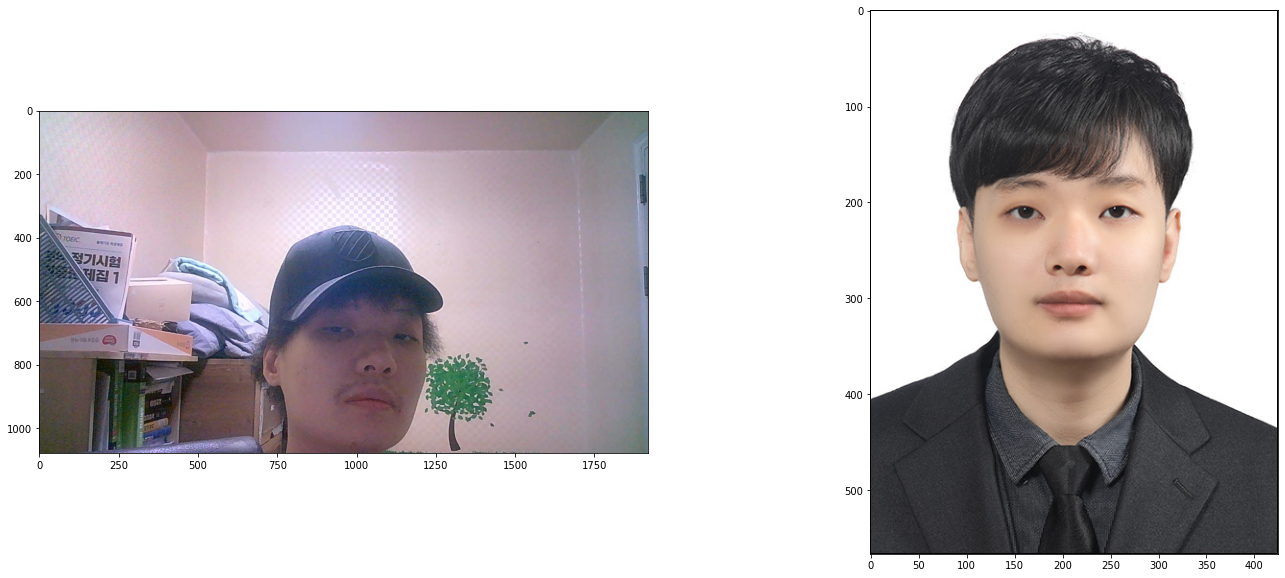

In [90]:
import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/my photo'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

import matplotlib.pyplot as plt
import matplotlib.image as img

#Set figsize here
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
    image = img.imread(dir_path+'/'+file_list[i])
    ax.imshow(image)
plt.show()

fig.tight_layout()

# Step2. 얼굴 영역 자르기
임베딩 추출을 위해서는 얼굴 영역을 잘라줘야 합니다. 위 Step1.에서 찾은 이미지들을 이전에 만들었던 get_cropped_face(image_file)을 통해서 잘라줍시다! 

자른 이미지는 PIL의 Image.fromarray를 통해서 PIL Image로 변환한 뒤에 저장을 해두면 다양한 재미있는 시각화를 시도해 보는 데 도움이 될 것입니다.

In [91]:
import face_recognition
import os

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

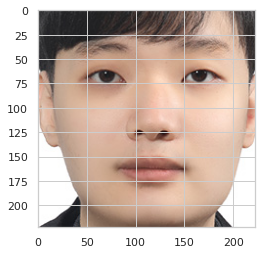

In [177]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/my photo/박준혁1.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

In [178]:
from PIL import Image
face = get_cropped_face(image_path)
pillow_image = Image.fromarray(face)
pillow_image.save(os.getenv('HOME')+'/aiffel/face_embedding/crob1/박준혁1.jpg' , 'JPEG')

# Step3. 얼굴 영역의 임베딩 추출하기
* 이제 얼굴 영역으로 잘린 이미지들이 여럿 생겼을 텐데요. 그 이미지를 face_recognition 을 사용해서 이미지를 불러오고 임베딩을 추출해 봅시다. 
* 다른 사람의 임베딩은 구분할 수 있게 따로 저장해 주세요. 이전에 만들었던 다음 함수들을 활용하면 손쉽게 수행 가능합니다.



* ```def get_face_embedding(face)``` : 얼굴영역으로부터 얼굴 임베딩 벡터를 구하는 함수


* ```def get_face_embedding_dict(dir_path)``` : 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수

In [99]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/crob1'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['최민수.jpg', '조정석.jpg', '차태현.jpg', '유해진.jpg', '최민식.jpg', '심형탁.jpg', '남궁민.jpg', '박성웅.jpg', '윤종신.jpg', '조춘.jpg', '황정민.jpg', '이지훈.jpg', '박준혁2.jpg', '고창석.jpg', '김상중.jpg', '박준혁1.jpg', '차승원.jpg', '김남길.jpg', '정준호.jpg', '이상윤.jpg', '이선균.jpg', '마동석.jpg', '지진희.jpg', '배용준.jpg', '유연석.jpg']


In [95]:
image_file = os.path.join(dir_path, '유해진.jpg')
face = get_cropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-6.09234092e-04,  1.11142881e-01,  9.89236683e-02, -3.61188240e-02,
        -1.39666095e-01,  1.58686452e-02, -1.06853977e-01, -1.23402402e-01,
         5.37084974e-02, -6.99460432e-02,  2.82344252e-01,  1.89348012e-02,
        -1.96836427e-01, -9.48342979e-02, -9.29829702e-02,  1.57099426e-01,
        -1.67507291e-01, -1.19559750e-01, -4.09197174e-02,  2.56674513e-02,
         8.70220661e-02,  1.62831340e-02,  6.35690093e-02, -4.46979925e-02,
        -9.97878313e-02, -3.09611350e-01, -8.65300447e-02, -4.26155254e-02,
         2.29810290e-02, -2.64338292e-02, -6.38208389e-02, -6.64795935e-03,
        -2.23940790e-01, -1.98551305e-02,  3.64222601e-02,  1.87943764e-02,
        -4.73579857e-04, -1.11816615e-01,  1.02073193e-01, -1.03473663e-04,
        -2.13954151e-01,  8.11721385e-02,  6.53440692e-03,  1.81329161e-01,
         1.98637381e-01, -1.83242764e-02,  7.54135847e-02, -1.68934658e-01,
         6.46346211e-02, -1.12253383e-01,  5.04439808e-02,  1.56817675e-01,
         1.0

In [96]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
        # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
        # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

In [100]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['마동석']

array([-0.08588441,  0.08261463,  0.07091177,  0.00936297, -0.05718765,
       -0.06518973, -0.08262409, -0.14313072,  0.06394633, -0.0685436 ,
        0.12290798, -0.08173616, -0.20542154, -0.08304674, -0.02368602,
        0.15088719, -0.11090271, -0.11776971, -0.01803589, -0.0446933 ,
        0.03690634,  0.02232312,  0.01462134,  0.01097235, -0.09260923,
       -0.24521182, -0.02023141, -0.09846254, -0.00665274, -0.04116635,
       -0.09900204,  0.03667113, -0.16379589, -0.05357655,  0.0426574 ,
        0.09276636, -0.00976449, -0.04712031,  0.18525705,  0.05035046,
       -0.12579186, -0.0185683 , -0.0057656 ,  0.25182796,  0.19120784,
        0.04256656,  0.01336888, -0.16199532,  0.11128052, -0.18165897,
        0.03501638,  0.13305449,  0.08167779,  0.06139755,  0.00613068,
       -0.14516206,  0.05772326,  0.01301669, -0.14770879,  0.07156701,
        0.09253113, -0.04480094, -0.05498699, -0.07236973,  0.29486942,
        0.04124283, -0.13365854, -0.08730406,  0.10069849, -0.11

# Step4. 모은 연예인들과 비교하기
모은 연예인 사진들과 자신의 얼굴 사진에서 추출한 임베딩 벡터들 간의 거리를 비교해 보고 가장 작은 연예인이 누구인지 찾아봅시다!

이전 스텝에서 만들었던 ```get_nearest_face(name, top=5)``` 함수들을 응용하면 손쉽게 수행 가능합니다.

In [101]:
def get_nearest_face(name, top=5): 
    pass
get_nearest_face('박준혁1')

In [102]:
import numpy as np
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)
get_distance('박준혁1','박준혁2')

0.5089646030515044

In [103]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('박준혁1')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('output') 라고 호출할 때 output와 output1 사이의 임베딩 벡터 거리를 계산합니다.

In [76]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('박준혁1',
  array([-0.12849964,  0.02963445,  0.0099593 , -0.10735964, -0.09022651,
         -0.09977371, -0.07606516, -0.11186355,  0.08790684, -0.0938312 ,
          0.14099739, -0.1032344 , -0.15894207, -0.10085159, -0.05939471,
          0.16226727, -0.14633077, -0.15146215, -0.05885185,  0.01937412,
          0.10437813, -0.00581972, -0.02911391,  0.03059366, -0.09659933,
         -0.32311961, -0.1282039 , -0.03919494,  0.02281119, -0.00935316,
         -0.03874351,  0.10632449, -0.17693572, -0.03607047,  0.0198613 ,
          0.12717655,  0.0061087 , -0.09726307,  0.12734887, -0.00105577,
         -0.25498974,  0.00975864,  0.06740241,  0.21544178,  0.21856335,
         -0.03982631,  0.0850154 , -0.10538016,  0.12842639, -0.14339973,
         -0.0301668 ,  0.13897632,  0.07881728,  0.06078715,  0.04382059,
         -0.09925831,  0.05640757,  0.15125176, -0.14039855,  0.01645813,
          0.09655823, -0.0775359 , -0.04699688, -0.13520895,  0.18328856,
          0.07975449, -0.138

In [126]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [105]:
# 박준혁1과 가장 닮은 사람은 누굴까요?
get_nearest_face('박준혁1')

순위 1 : 이름(남궁민), 거리(0.41401492622847585)
순위 2 : 이름(유연석), 거리(0.47456000732349135)
순위 3 : 이름(이선균), 거리(0.4966059809187843)
순위 4 : 이름(김남길), 거리(0.5081087384845658)
순위 5 : 이름(김상중), 거리(0.5087453381067933)


In [108]:
# 박준혁2과 가장 닮은 사람은 누굴까요?
get_nearest_face('박준혁2')

순위 1 : 이름(박준혁1), 거리(0.5089646030515044)
순위 2 : 이름(남궁민), 거리(0.5111439296189693)
순위 3 : 이름(유연석), 거리(0.5284026609163069)
순위 4 : 이름(이선균), 거리(0.5454752755150495)
순위 5 : 이름(황정민), 거리(0.5481817268626913)


# Step5. 다양한 재미있는 시각화 시도해 보기

비단 닮은 꼴 연예인을 찾기만 할 것이 아니라, 그들의 얼굴 사진을 활용하여 재미있는 시각화를 시도해 보시기 바랍니다.

tkinter나 flask를 활용해서 닮은꼴을 찾을 이미지를 업로드한 후 그 이미지와 닮은 얼굴을 찾는 형태로 구현해 보는 것도 재미있을 것입니다.

여러분들의 재치가 넘치는 작품들을 기대합니다. 😎

In [159]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



In [119]:
sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

In [120]:
sorted_faces

[('박준혁1',
  array([-0.12849964,  0.02963445,  0.0099593 , -0.10735964, -0.09022651,
         -0.09977371, -0.07606516, -0.11186355,  0.08790684, -0.0938312 ,
          0.14099739, -0.1032344 , -0.15894207, -0.10085159, -0.05939471,
          0.16226727, -0.14633077, -0.15146215, -0.05885185,  0.01937412,
          0.10437813, -0.00581972, -0.02911391,  0.03059366, -0.09659933,
         -0.32311961, -0.1282039 , -0.03919494,  0.02281119, -0.00935316,
         -0.03874351,  0.10632449, -0.17693572, -0.03607047,  0.0198613 ,
          0.12717655,  0.0061087 , -0.09726307,  0.12734887, -0.00105577,
         -0.25498974,  0.00975864,  0.06740241,  0.21544178,  0.21856335,
         -0.03982631,  0.0850154 , -0.10538016,  0.12842639, -0.14339973,
         -0.0301668 ,  0.13897632,  0.07881728,  0.06078715,  0.04382059,
         -0.09925831,  0.05640757,  0.15125176, -0.14039855,  0.01645813,
          0.09655823, -0.0775359 , -0.04699688, -0.13520895,  0.18328856,
          0.07975449, -0.138

In [167]:
def get_nearest_face1(name, top=24):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
get_nearest_face1('박준혁1')

순위 1 : 이름(남궁민), 거리(0.41401492622847585)
순위 2 : 이름(유연석), 거리(0.47456000732349135)
순위 3 : 이름(이선균), 거리(0.4966059809187843)
순위 4 : 이름(김남길), 거리(0.5081087384845658)
순위 5 : 이름(김상중), 거리(0.5087453381067933)
순위 6 : 이름(배용준), 거리(0.5088485360480685)
순위 7 : 이름(박준혁2), 거리(0.5089646030515044)
순위 8 : 이름(이상윤), 거리(0.5318802270447154)
순위 9 : 이름(황정민), 거리(0.5393207022194367)
순위 10 : 이름(심형탁), 거리(0.5427200137397168)
순위 11 : 이름(조정석), 거리(0.556245876813041)
순위 12 : 이름(정준호), 거리(0.5581342403277404)
순위 13 : 이름(차태현), 거리(0.5606482317104838)
순위 14 : 이름(지진희), 거리(0.5697055081128872)
순위 15 : 이름(유해진), 거리(0.5953876112376072)
순위 16 : 이름(차승원), 거리(0.6087375369334941)
순위 17 : 이름(마동석), 거리(0.6128049164105887)
순위 18 : 이름(고창석), 거리(0.628789026786359)
순위 19 : 이름(이지훈), 거리(0.6568805401035392)
순위 20 : 이름(박성웅), 거리(0.6627473151298867)
순위 21 : 이름(윤종신), 거리(0.6734290328117205)
순위 22 : 이름(최민식), 거리(0.6846097682424572)
순위 23 : 이름(최민수), 거리(0.70414316031244)
순위 24 : 이름(조춘), 거리(0.7618112470323024)


file_list: ['최민수.jpg', '조정석.jpg', '차태현.jpg', '유해진.jpg', '최민식.jpg', '심형탁.jpg', '남궁민.jpg', '박성웅.jpg', '윤종신.jpg', '조춘.jpg', '황정민.jpg', '이지훈.jpg', '박준혁2.jpg', '고창석.jpg', '김상중.jpg', '박준혁1.jpg', '차승원.jpg', '김남길.jpg', '정준호.jpg', '이상윤.jpg', '이선균.jpg', '마동석.jpg', '지진희.jpg', '배용준.jpg', '유연석.jpg']


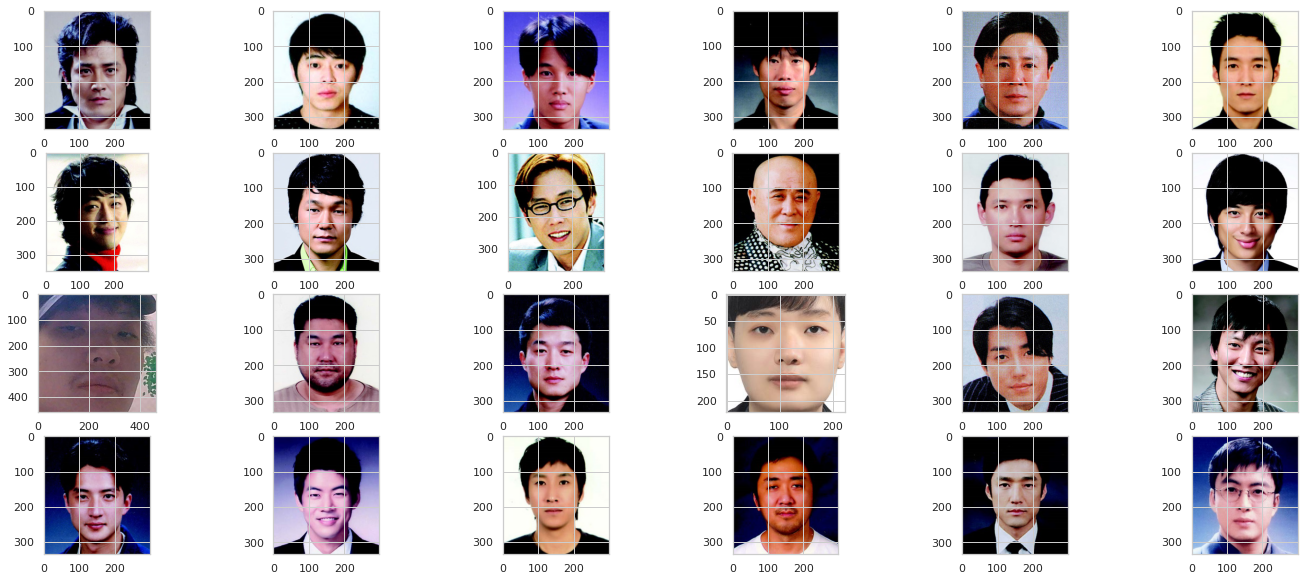

In [179]:

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/crob1'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

import matplotlib.pyplot as plt
import matplotlib.image as img

#Set figsize here
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
    image = img.imread(dir_path+'/'+file_list[i])
    ax.imshow(image)
plt.show()

fig.tight_layout()

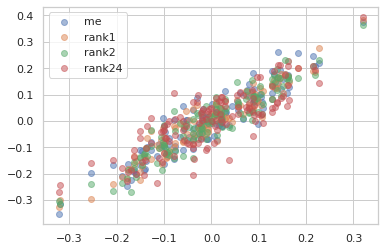

In [171]:
plt.scatter(embedding_dict['박준혁1'],embedding_dict['박준혁2'],alpha=0.5 ,label='me')
plt.scatter(embedding_dict['박준혁1'],embedding_dict['남궁민'],alpha=0.5 , label='rank1')
plt.scatter(embedding_dict['박준혁1'],embedding_dict['유연석'],alpha=0.5, label='rank2')
plt.scatter(embedding_dict['박준혁1'],embedding_dict['조춘'],alpha=0.5, label ='rank24')

plt.legend()
plt.show()

거리가 멀수록 분포간격이 넓다는걸 보았다.

# 회귀

초반에 ipynb checkpoint로 골머리를 속였다. 그것은 자동저장 체크포인트로 저장해놓은것 이었는데, for문에 섞여들어가서, 오류를 일으켰다. 
해결방법은 숨겨진 파일을 삭제하는 방법과, 아예 폴더를 옮기는 수 밖에 없었다. 그래서, 숨겨진 파일을 삭제하는 방법으로 하려 했으나, 실패하고 아예 폴더를 옮기는 식으로 오류를 해결했다.


체크포인트로 많은 시간을 썼다. 자꾸 자동저장되니깐 되던 것이 안되는 수준이 되었다. 그래서,코드를 작성하는것 보다, 좀더 많은 시간을 할애했다. 시각화도 많은 시간을 썻다. 처음엔 막대그래프로 하나하나, 거리를 나타내는 것으로 나타내고 싶었지만, 시각화에 대한 것이 어려운것 같다. 조금 더 쉬운 분산를 이용해, 할 수 밖에 없었다. 좀더 공부를 해야한다.

* tmi: 솔직히 전혀 안닮은것같다.
